### Investigating the polarization of light

###### By Brandon Weiss and Pranav Charvu
#### 3 November 2020

### Introduction and Background

Through one polarized filter, the average polarized intensity is approximately one half the initial intensity of the light.

Malus's Law states that the intensity of light transmitted through a polarized filter is directly proportional to the cosine of the angle between the polarization directions squared. $$I_t = I_0\cos^2(\theta)$$
This is applicaple when already polarized light passes through a filter.

### Objective
Understand and model the effect of polarized filters.

### Materials
1. 3 Polarized filters
2. Voltmeter
3. Solar cell
4. Light source
5. Tape measure
6. Protractor

### Procedure
1. Mark direction of polarization on each filter
2. Hook up solar cell to voltmeter
3. Measure ambient light voltage by removing main light source and measuring voltage
4. Used protractor to draw a 2π radian protractor with the following angles: 0, π/6, π/4, π/3, π/2, 2π/3, 3π/4, 5π/6, π, 7π/6, 5π/4, 4π/3, 3π/2, 5π/3, 7π/4, 11π/6, 2π.
5. Place protractor on surface and place solar cell on top of protractor with the first polarized filter on top of that.
6. Place another polarized filter between light source and solar cell at a relative angle of 0 between the filters. Use a 6.35 cm tall object to elevate the second filter and keep this filter at a set angle of 0 radians.
7. Rotate the initial filter (closest to the solar cell) and record the voltage reading at all the angles on the protractor described above.
8. Set the two original filters at a relative angle of π/2 between the polarization direction and introduce a third filter between the two initial filters.
9. Rotate the third filter and record the voltage reading at the same angles as in step 6.
10. Subtract ambient light voltage from each reading.

In [206]:
from IPython.display import Image
Image(filename='IMG1.jpg')
Image(filename='IMG2.jpg')
Image(filename='IMG3.jpg')
Image(filename='IMG4.jpg')
Image(filename='IMG5.jpg')


FileNotFoundError: [Errno 2] No such file or directory: 'IMG1.jpg'

<img src="IMG1.jpg">

### Hypothesis
In the 2 filter setup, we believe that the greatest voltage will be measured when the polarized filters are at angles of 0 and π, and the least voltage will me measured when the filters are at angles of π/2 and 3π/2. This is in accordance with Malus's Law stated above.

In the 3 filter setup, we believe that the greatest voltage will be measured at angles of π/4, 3π/4, 5π/4, and 7π/4. This is also in accordance with Malus's Law stated above.

In [213]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [232]:
# Collect the data
ambient = 268
oneFilter = 694 - ambient
noFilter = 793 - ambient
pi = np.pi
angles = np.array([0, pi/6, pi/4, pi/3, pi/2, 2*pi/3, 3*pi/4, 5*pi/6, pi, 
                   7*pi/6, 5*pi/4, 4*pi/3, 3*pi/2, 5*pi/3, 7*pi/4, 11*pi/6, 2*pi])
xrange = np.linspace(angles[0], angles[-1], 1000)
twoFilterRaw = np.array([671, 633, 599, 509, 367, 557, 615, 660, 673,
                      631, 595, 494, 355, 566, 632, 669, 671])
threeFilterRaw = np.array([293, 436, 474, 463, 284, 452, 490, 468, 297,
                         428, 472, 457, 277, 465, 490, 468, 271])
twoFilter = twoFilterRaw - ambient
threeFilter = threeFilterRaw - ambient
print(twoFilter)
print(threeFilter)

[403 365 331 241  99 289 347 392 405 363 327 226  87 298 364 401 403]
[ 25 168 206 195  16 184 222 200  29 160 204 189   9 197 222 200   3]


In [215]:
# Define fit function for 2 filters
def fit2(x, A, B, C):
    return A * np.cos(B*x)**2 + C

In [230]:
guess = (300, 1.0, 150.0)
fitparams, covars = curve_fit(fit2, angles, twoFilter, p0=guess)
print("Parameters: " + str(fitparams))
print(np.sqrt([covars[i,i] for i in range(len(covars))]))

Parameters: [277.03320988   1.02731032 164.07934088]
[3.05936272e+01 1.32287392e-02 1.92573495e+01]


In [236]:
# Calculate residuals for the 2 filter fit
def calcRes(x, y, fit):
    res = np.subtract([fit[0] * np.cos(fit[1]*z)**2 + fit[2] for z in x], y)
    return res
res = calcRes(angles, twoFilter, fitparams)
print(np.std(res))

36.82245228690047


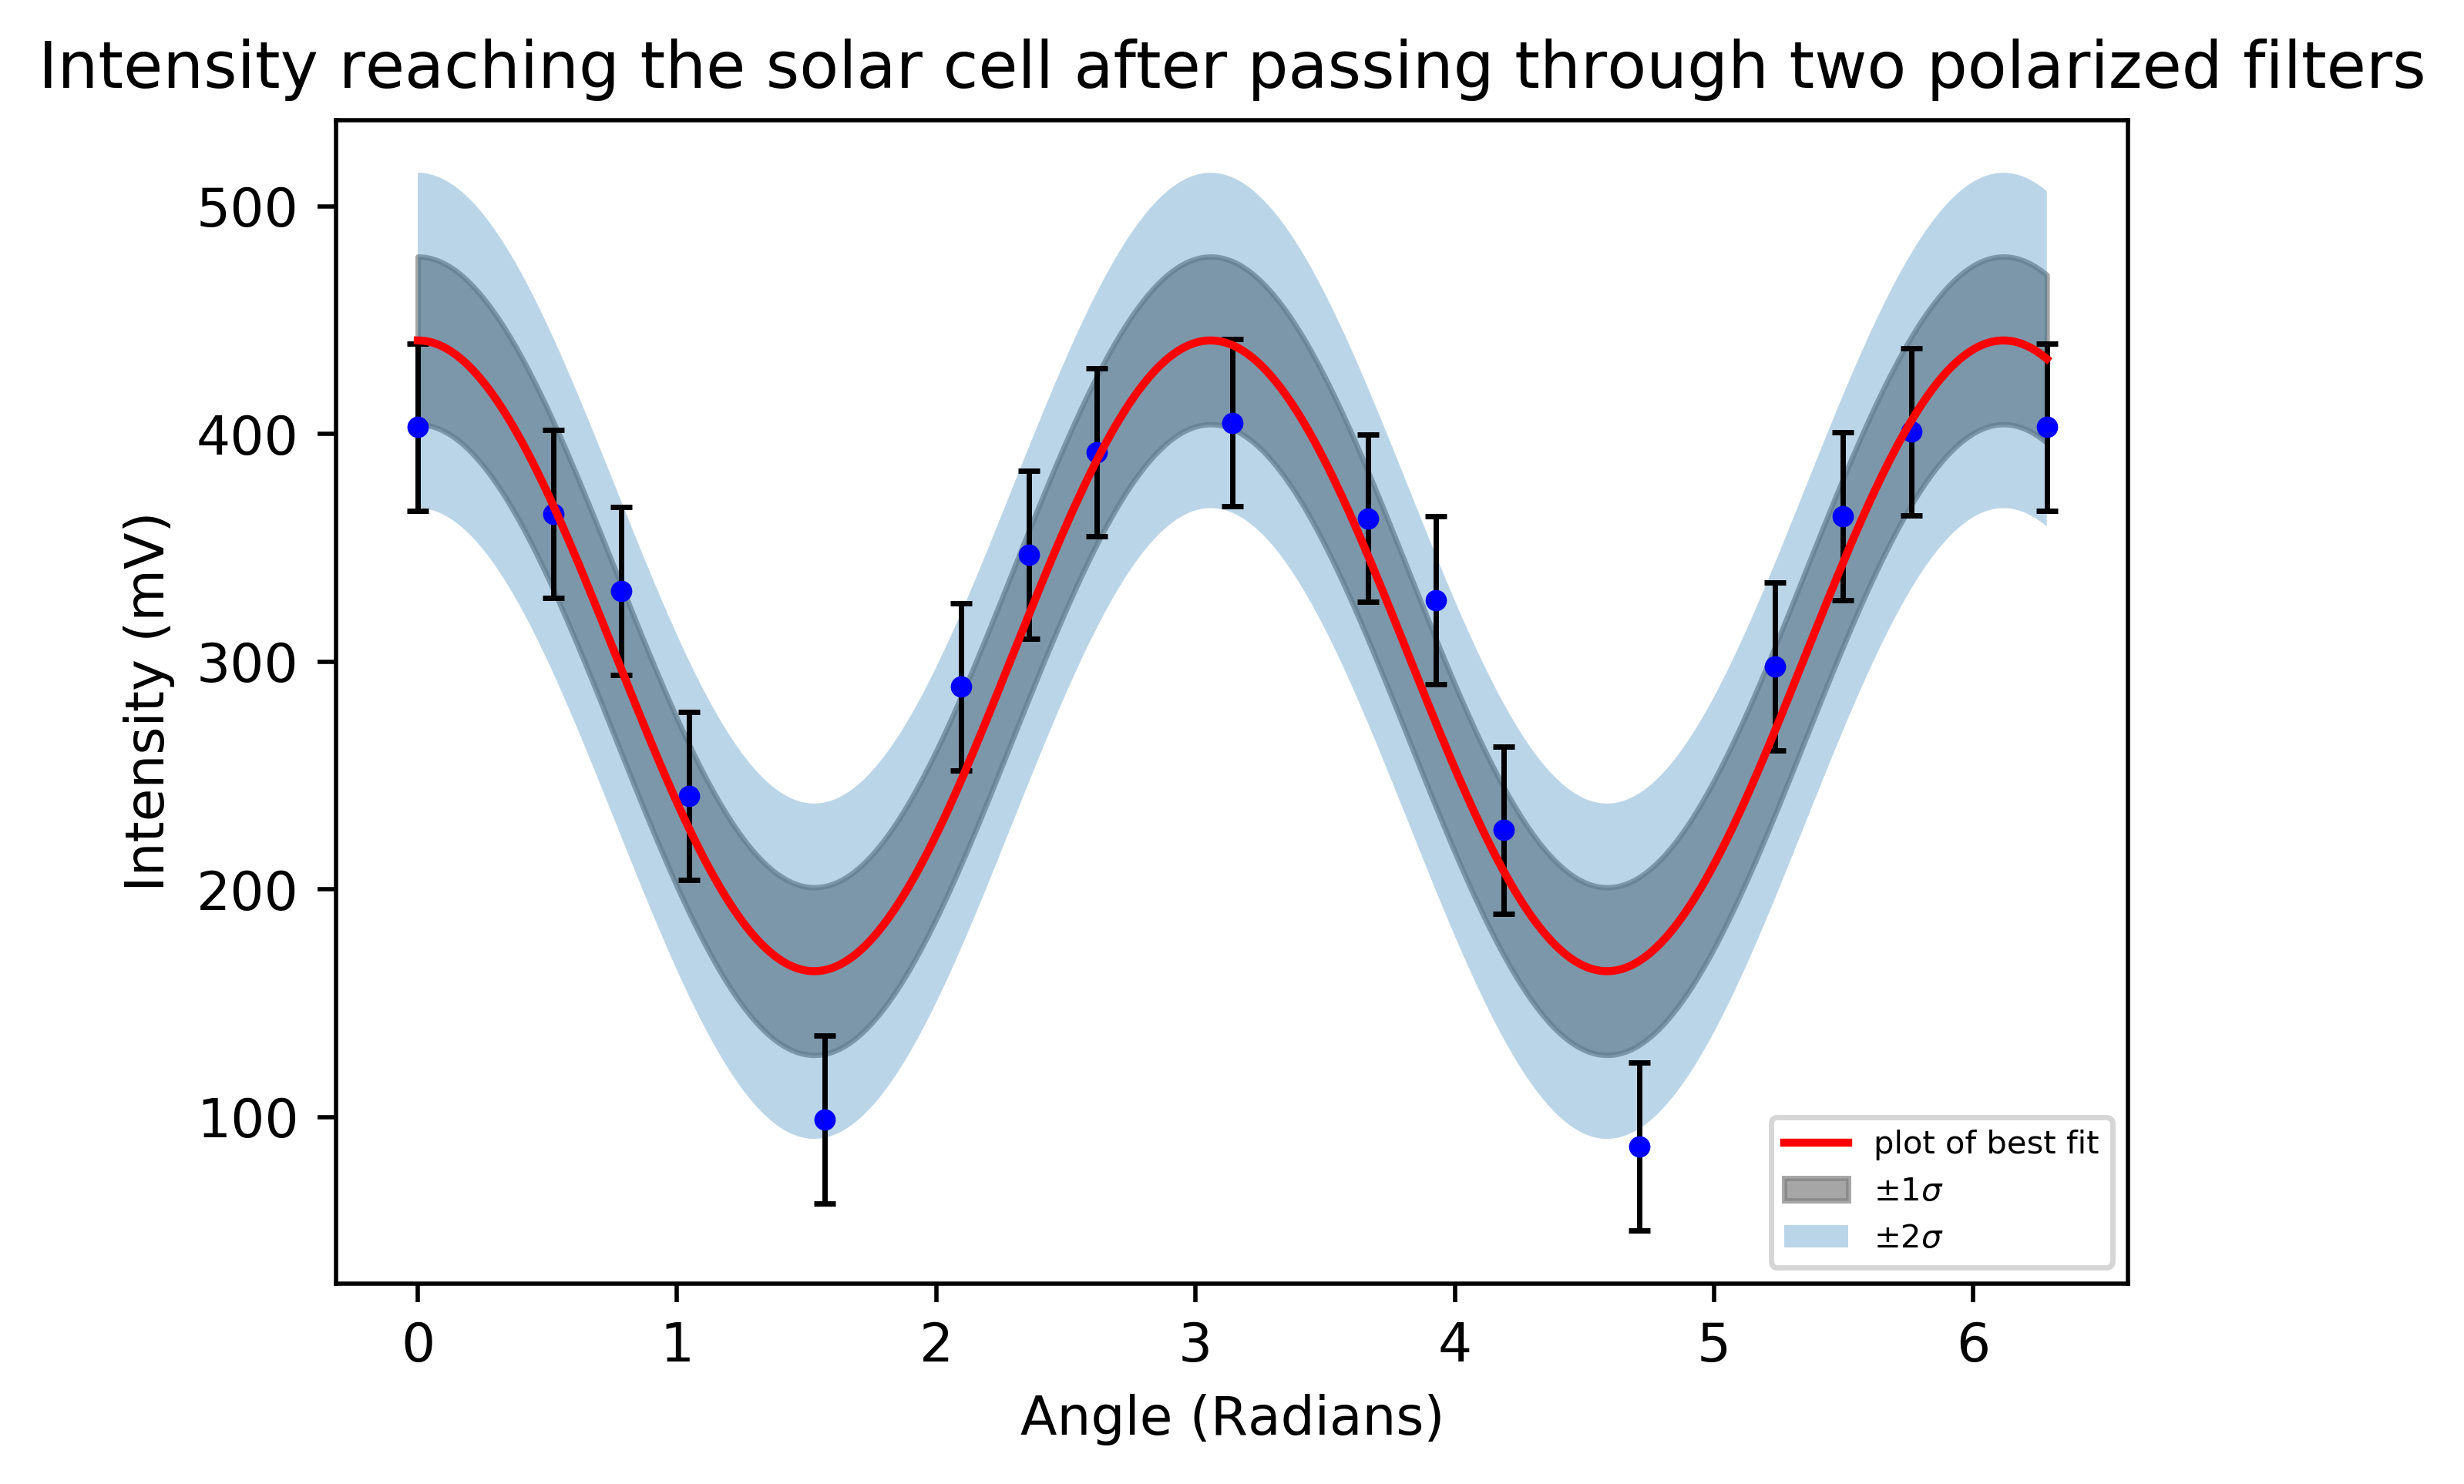

In [218]:
#Setting up the 2 filter data plot
plt.figure(dpi=500)
plt.title("Intensity reaching the solar cell after passing through two polarized filters")
plt.ylabel("Intensity (mV)")
plt.xlabel("Angle (Radians)")

#Plot data points
plt.plot(angles, twoFilter, 'b.')
plt.errorbar(angles, twoFilter, np.std(res), ls='none', color='black', capsize=2, elinewidth=1)

#Plot line of best fit
plt.plot(xrange, fit2(xrange, *fitparams), "r-", label='plot of best fit')

#Plot region of uncertainty for the data
plt.fill_between(xrange, fit2(xrange, *fitparams) - np.std(res), 
                 fit2(xrange, *fitparams) + np.std(res), alpha = 0.7, color='gray', 
                 label=r'$\pm 1 \sigma$')
plt.fill_between(xrange, fit2(xrange, *fitparams) - 2*np.std(res), 
                 fit2(xrange, *fitparams) + 2*np.std(res), alpha = 0.3, 
                 label=r'$\pm 2 \sigma$')

#Include legend
plt.legend(loc=4, prop={'size': 6})

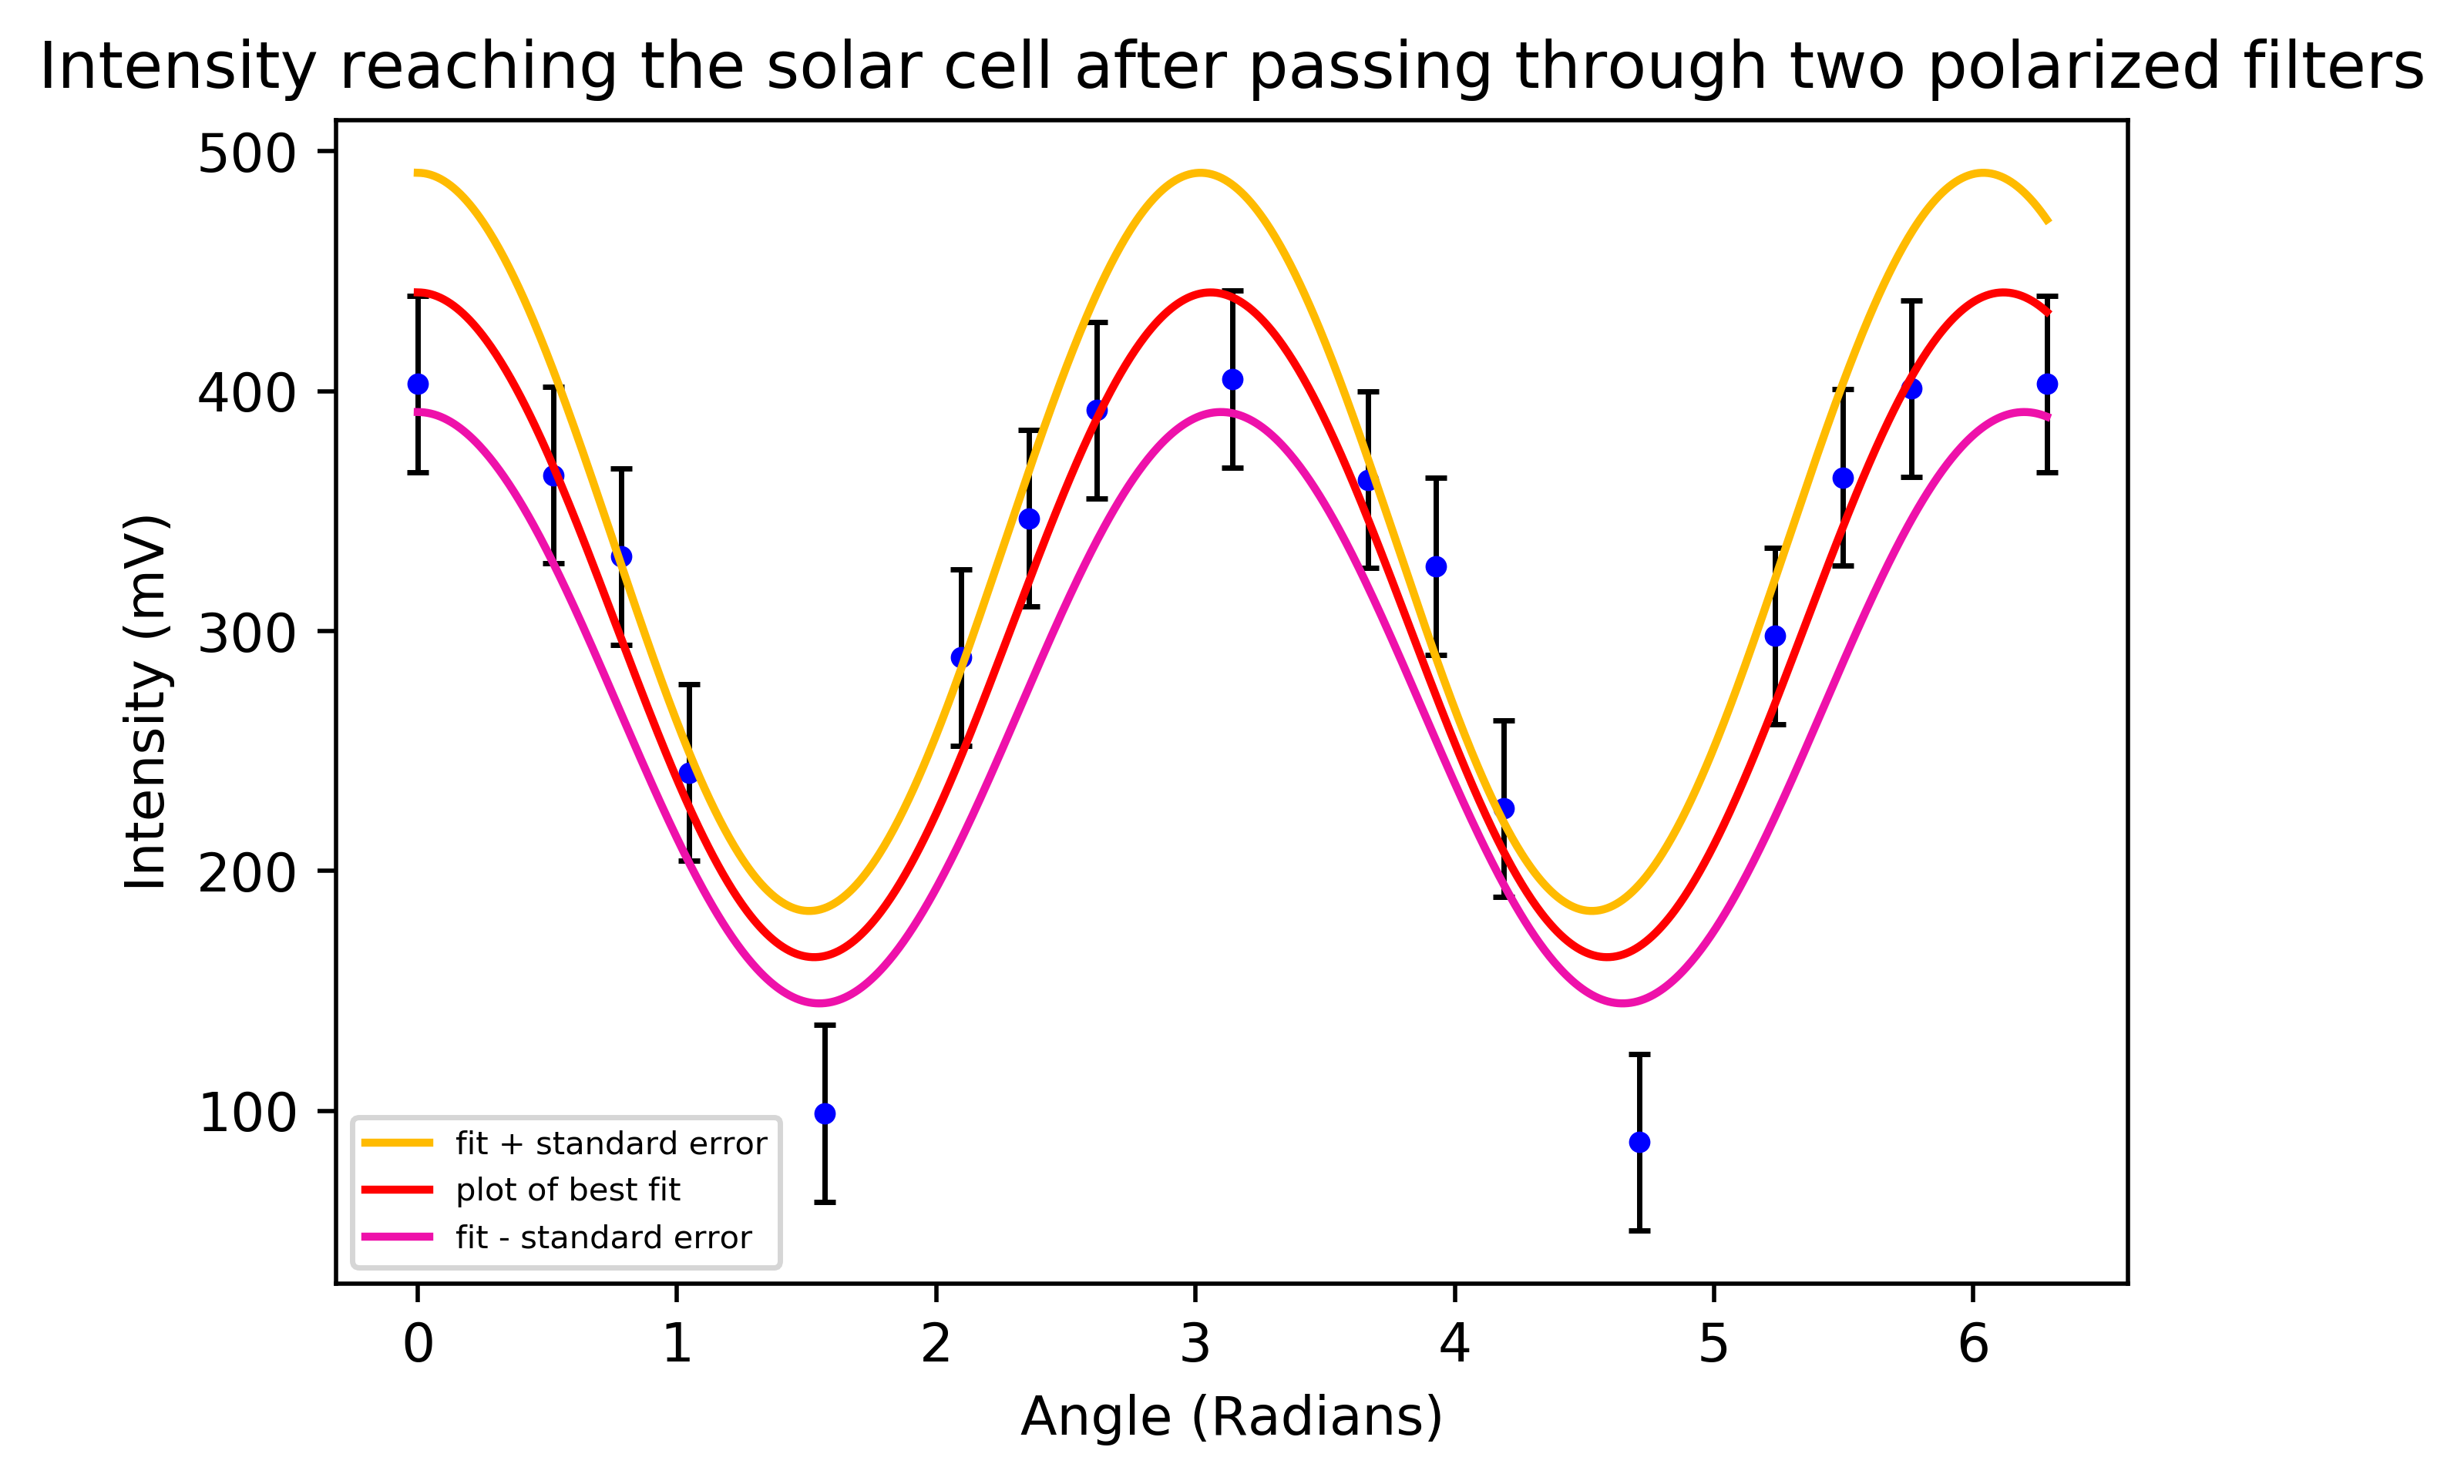

In [219]:
#Setting up the fit analysis plot for 2 filters
plt.figure(dpi=500)
plt.title("Intensity reaching the solar cell after passing through two polarized filters")
plt.ylabel("Intensity (mV)")
plt.xlabel("Angle (Radians)")

#Plot data points
plt.plot(angles, twoFilter, 'b.')
plt.errorbar(angles, twoFilter, np.std(res), ls='none', color='black', capsize=2, elinewidth=1)

#Plot lines of best fit
std_err = np.sqrt(np.diag(covars))
plt.plot(xrange, fit2(xrange, *fitparams + std_err), '#FFBB00', 
         label='fit + standard error')
plt.plot(xrange, fit2(xrange, *fitparams), "r-", label='plot of best fit')
plt.plot(xrange, fit2(xrange, *fitparams - std_err), '#EE11AA', 
         label='fit - standard error')

#Include legend
plt.legend(loc=0, prop={'size': 6})

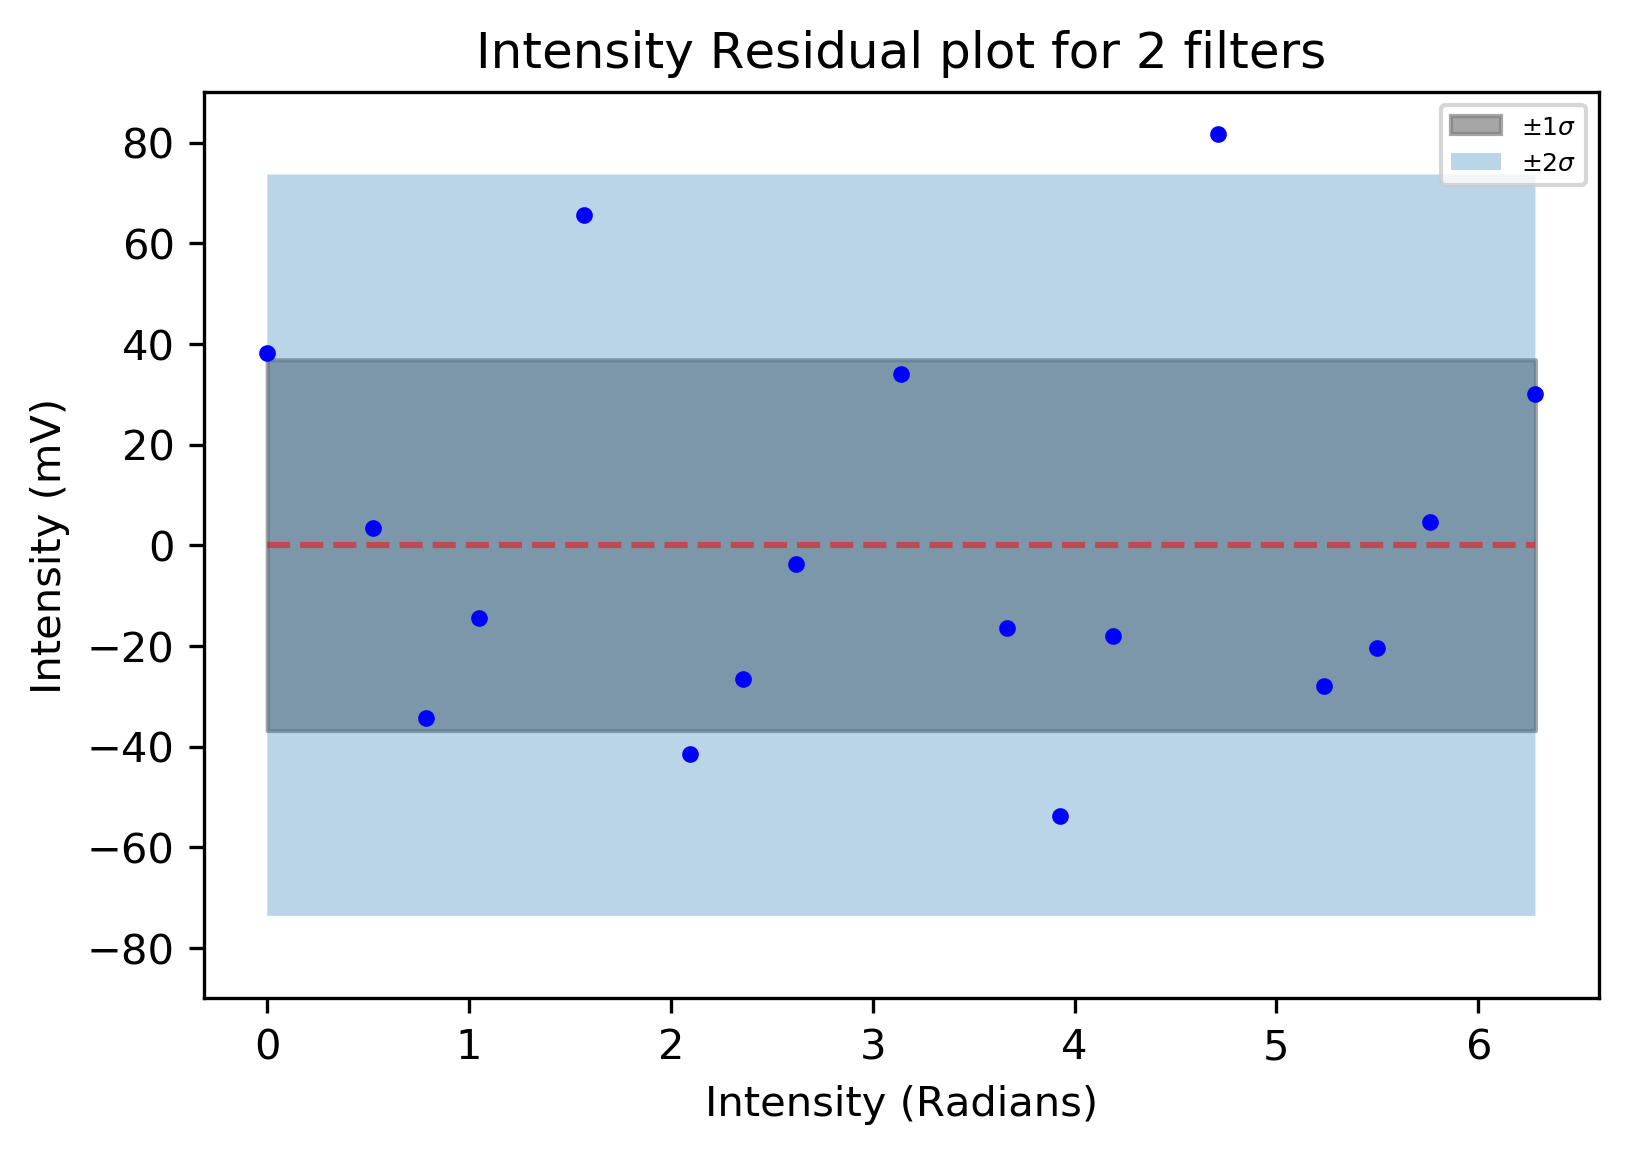

In [233]:
# Plotting the residual of the data points for 2 filters
plt.figure(dpi=300)
plt.ylim(ymin=-90, ymax=90)
plt.title('Intensity Residual plot for 2 filters')
plt.ylabel('Intensity (mV)')
plt.xlabel('Intensity (Radians)')
plt.plot(angles, res, "b.")
plt.plot(angles, np.zeros(len(angles)), "r--", alpha=0.5)

#Plot region of uncertainty for the data
plt.fill_between(xrange, np.zeros(len(xrange)) - np.std(res), 
                 np.zeros(len(xrange)) + np.std(res), alpha = 0.7, color='gray', 
                 label=r'$\pm 1 \sigma$')
plt.fill_between(xrange, np.zeros(len(xrange)) - 2*np.std(res), 
                 np.zeros(len(xrange)) + 2*np.std(res), alpha = 0.3, 
                 label=r'$\pm 2 \sigma$')

#Include legend
plt.legend(loc=0, prop={'size': 6})
plt.show()

In [221]:
# Chi Square statistic for 2 filter fit
summ = np.array([])
std = np.std(res)
for i in range(len(res)):
    summ = np.append(summ, res[i]**2 / std**2)
Chi2 = np.sum(summ)
print(Chi2, Chi2/(len(angles)-len(fitparams)))

17.0 1.2142857142857142


In [222]:
# Define fit function for 3 filters
def fit3(x, A, B, C, D):
    return A * np.cos(B*x)**2 * np.cos(pi/2 - C*x)**2 + D

In [231]:
guess = (800, 1.0, 1.0, 20)
fitparams3, covars3 = curve_fit(fit3, angles, threeFilter, p0=guess)
print("Parameters: " + str(fitparams3))
print(np.sqrt([covars3[i,i] for i in range(len(covars3))]))

Parameters: [826.25858395   0.99831456   0.9920613   19.74634549]
[3.74084050e+01 4.36597048e-03 4.36247640e-03 6.58433832e+00]


In [237]:
# Calculate residuals for the 3 filter fit
def calcRes3(x, y, fit):
    res = np.subtract([fit[0] * np.cos(fit[1]*z)**2 * np.cos(pi/2 - fit[2]*z)**2 
                       + fit[3] for z in x], y)
    return res
res3 = calcRes3(angles, threeFilter, fitparams3)
print(np.std(res3))

13.142889212496556


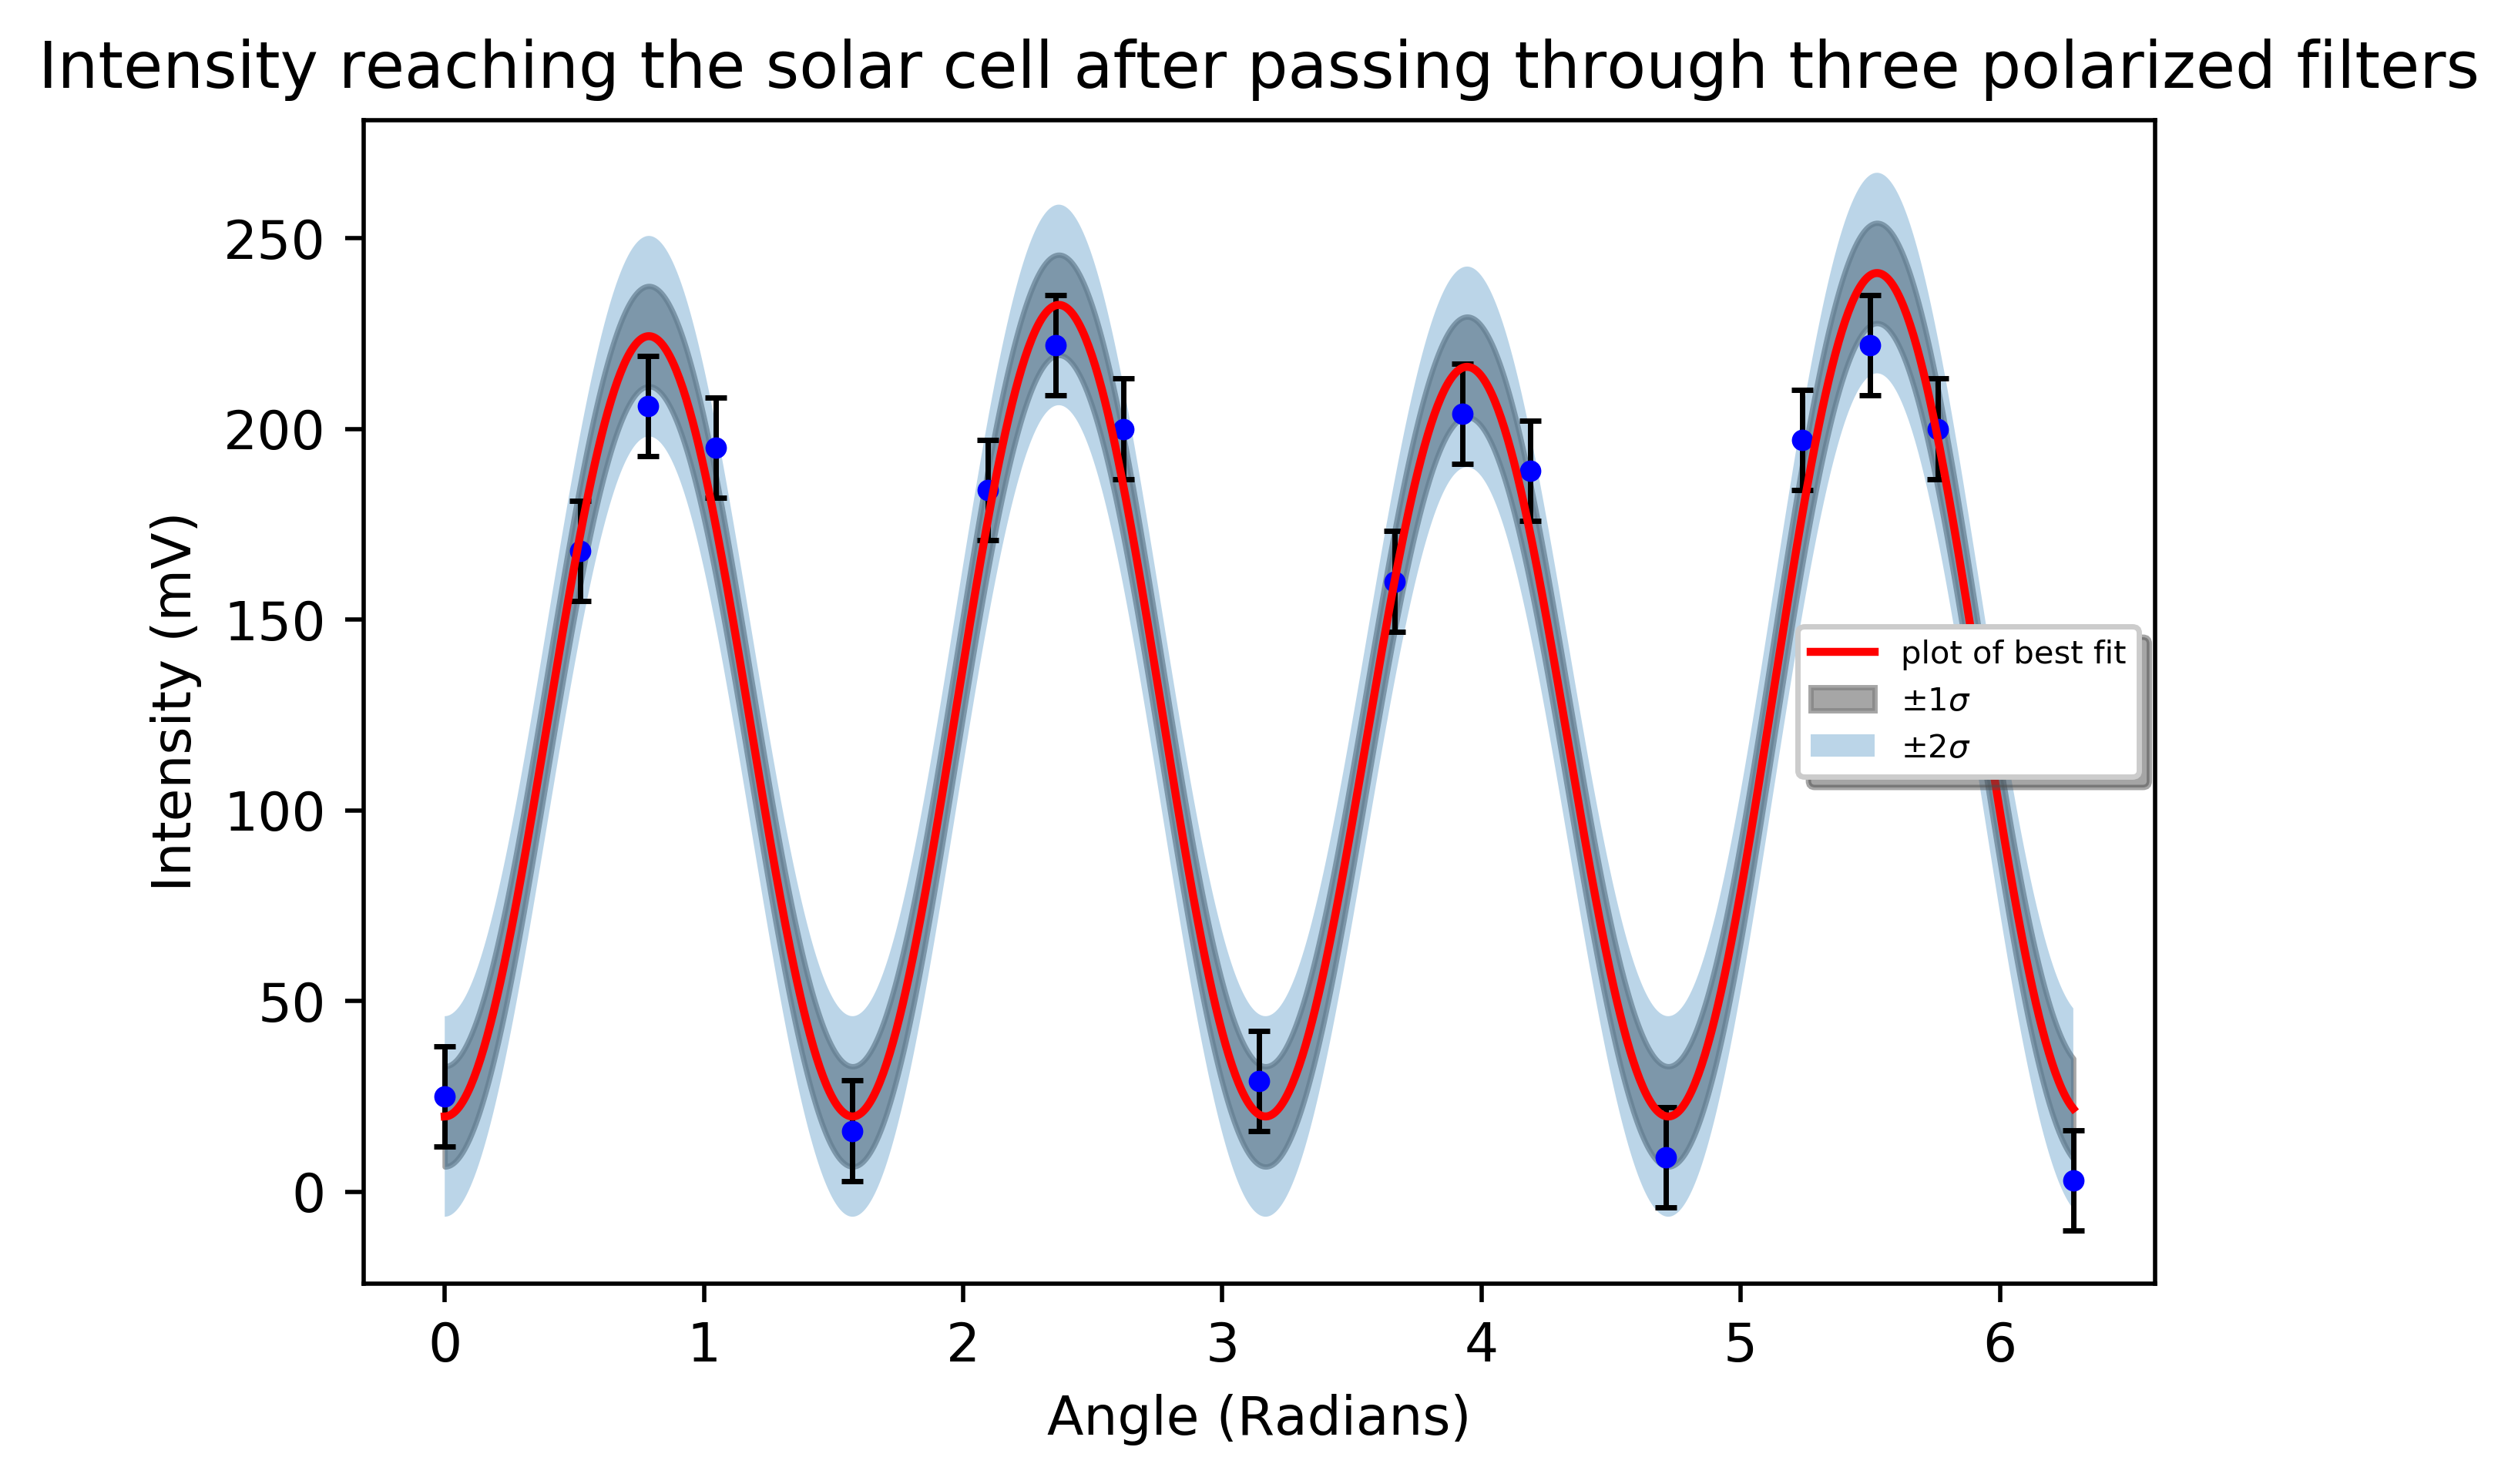

In [225]:
#Setting up the 3 filter data plot
plt.figure(dpi=500)
plt.title("Intensity reaching the solar cell after passing through three polarized filters")
plt.ylabel("Intensity (mV)")
plt.xlabel("Angle (Radians)")

#Plot data points
plt.plot(angles, threeFilter, 'b.')
plt.errorbar(angles, threeFilter, np.std(res3), ls='none', color='black', capsize=2, elinewidth=1)

#Plot line of best fit
plt.plot(xrange, fit3(xrange, *fitparams3), "r-", label='plot of best fit')

#Plot region of uncertainty for the data
plt.fill_between(xrange, fit3(xrange, *fitparams3) - np.std(res3), 
                 fit3(xrange, *fitparams3) + np.std(res3), alpha = 0.7, color='gray', 
                 label=r'$\pm 1 \sigma$')
plt.fill_between(xrange, fit3(xrange, *fitparams3) - 2*np.std(res3), 
                 fit3(xrange, *fitparams3) + 2*np.std(res3), alpha = 0.3, 
                 label=r'$\pm 2 \sigma$')

#Include legend
plt.legend(loc=7, prop={'size': 6}, shadow=True)

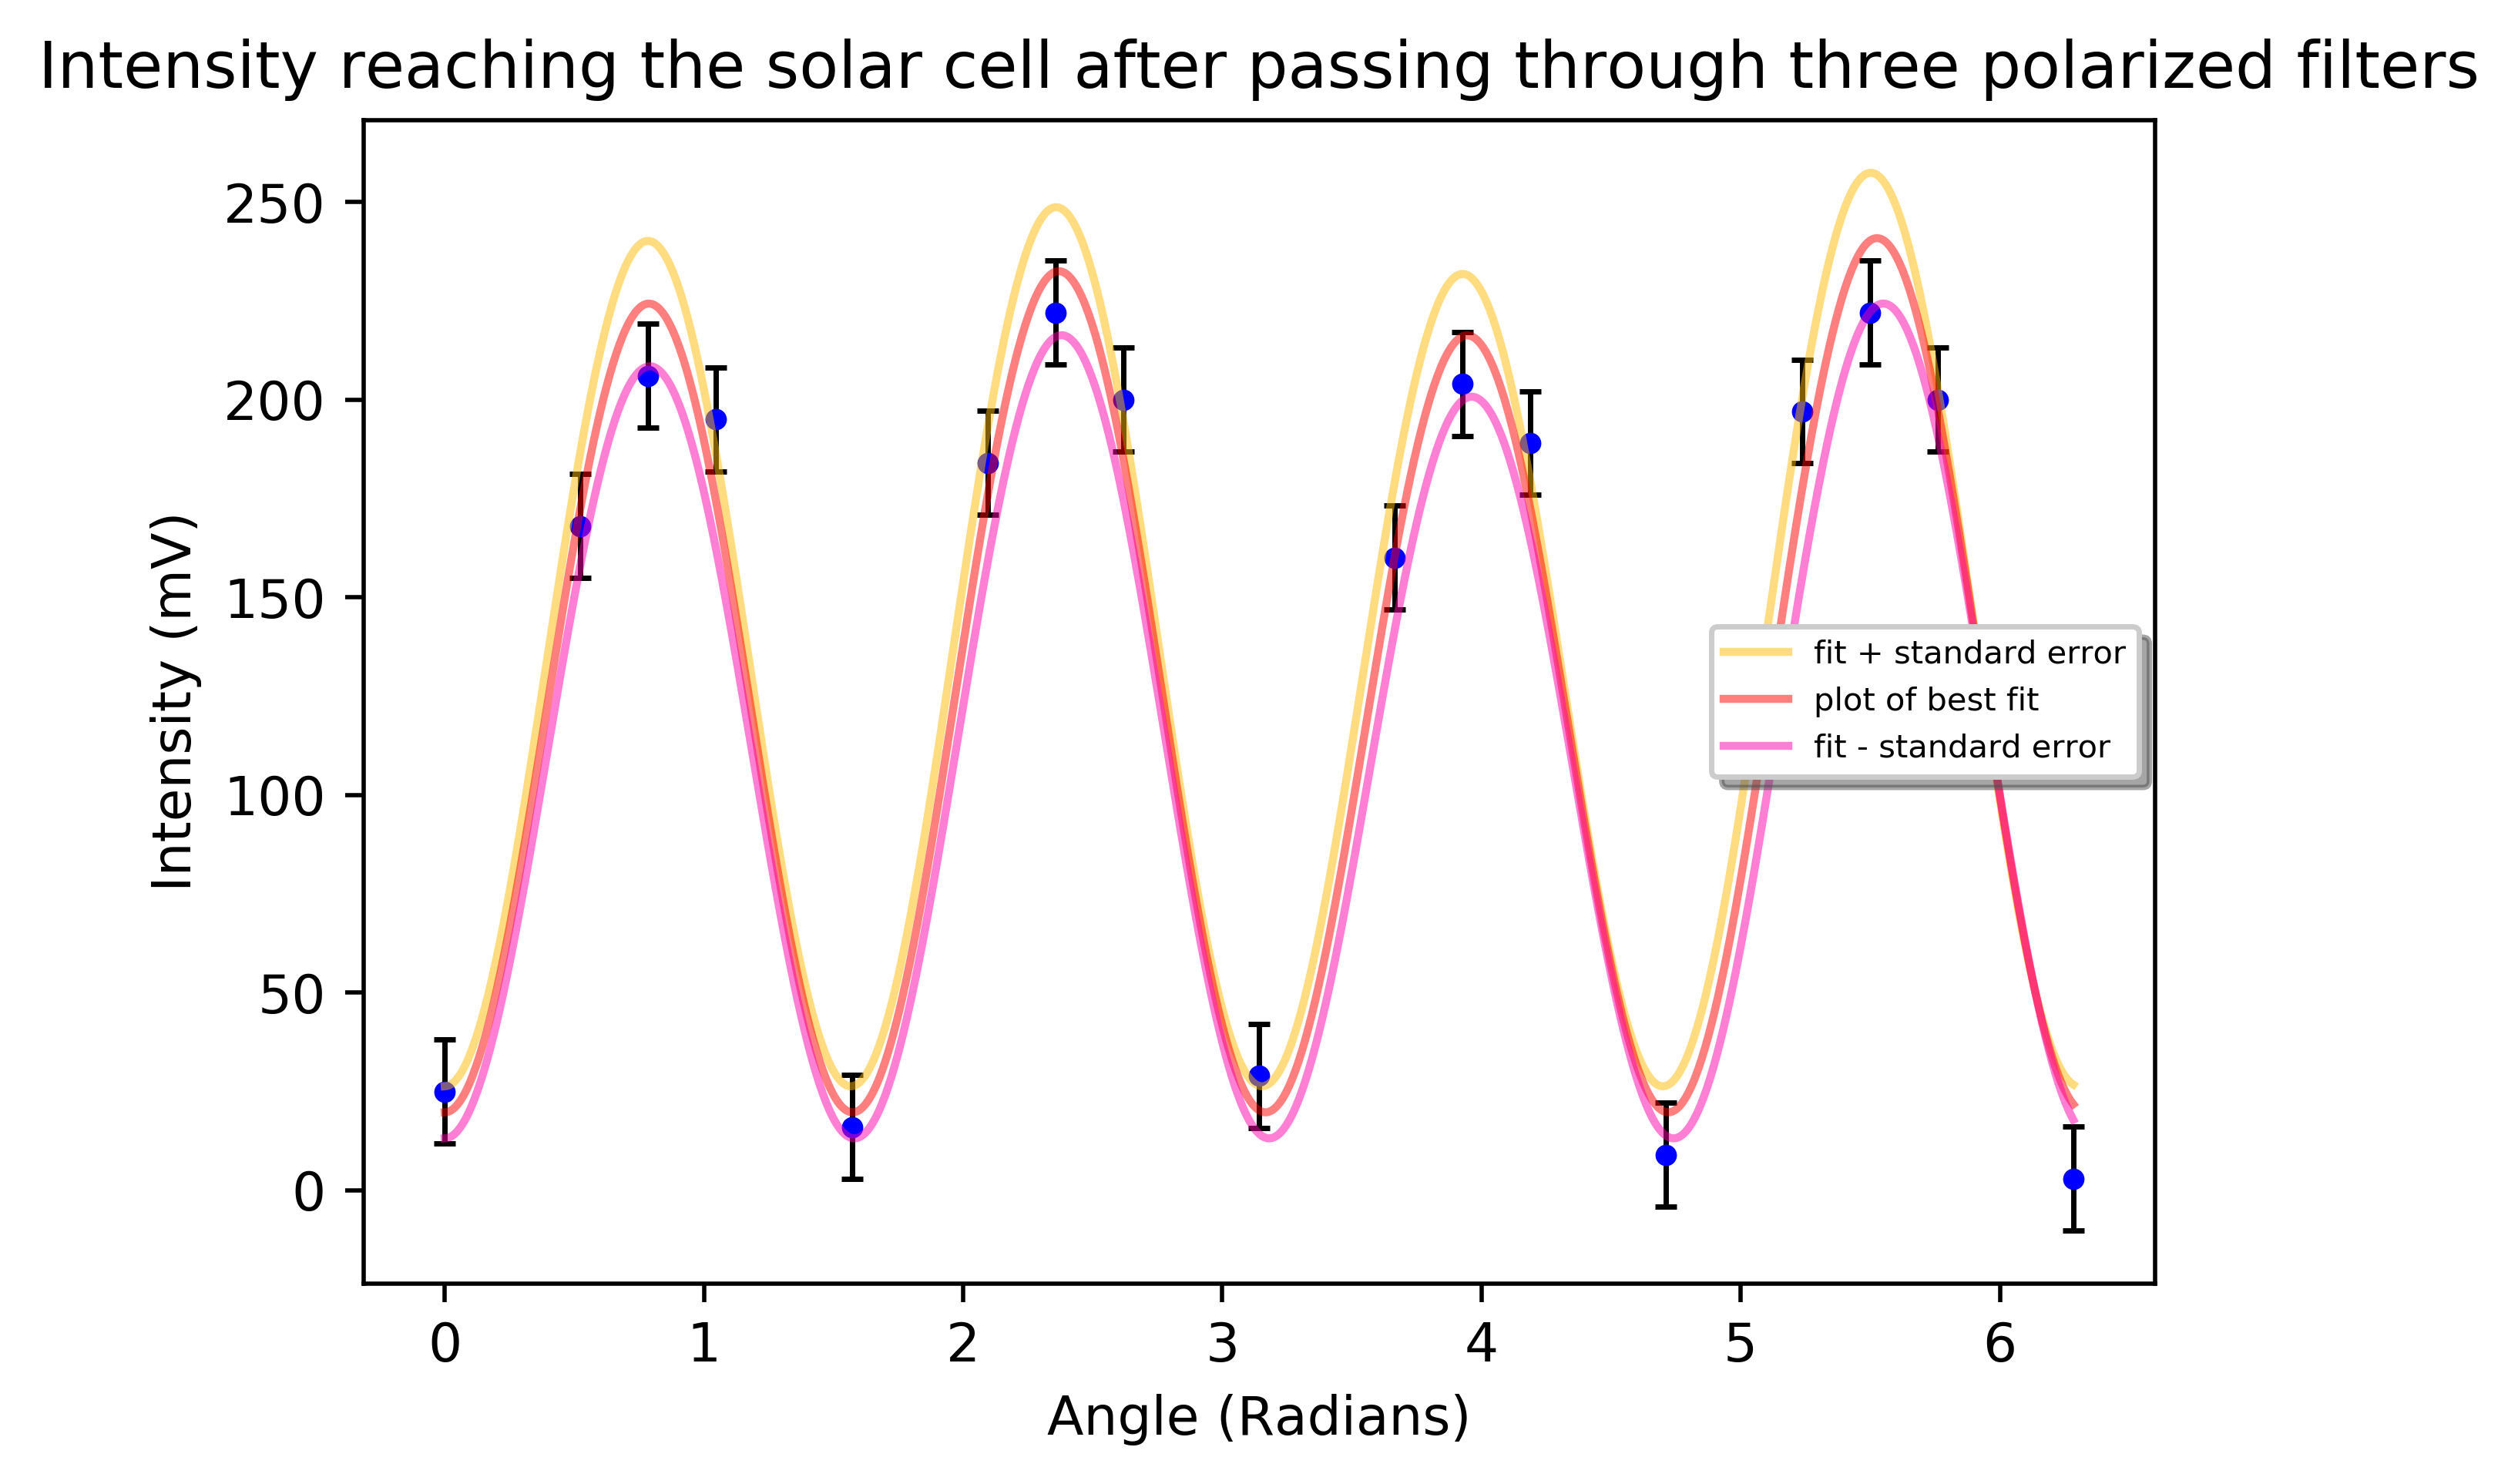

In [226]:
#Setting up the fit analysis plot for 3 filters
plt.figure(dpi=500)
plt.title("Intensity reaching the solar cell after passing through three polarized filters")
plt.ylabel("Intensity (mV)")
plt.xlabel("Angle (Radians)")

#Plot data points
plt.plot(angles, threeFilter, 'b.')
plt.errorbar(angles, threeFilter, np.std(res3), ls='none', color='black', capsize=2, elinewidth=1)

#Plot lines of best fit
std_err3 = np.sqrt(np.diag(covars3))
plt.plot(xrange, fit3(xrange, *fitparams3 + std_err3), '#FFBB00', 
         label='fit + standard error', alpha=0.5)
plt.plot(xrange, fit3(xrange, *fitparams3), "r-", label='plot of best fit', alpha=0.5)
plt.plot(xrange, fit3(xrange, *fitparams3 - std_err3), '#FF00AA', 
         label='fit - standard error', alpha=0.5)

#Include legend
plt.legend(loc=7, prop={'size': 6}, shadow=True)

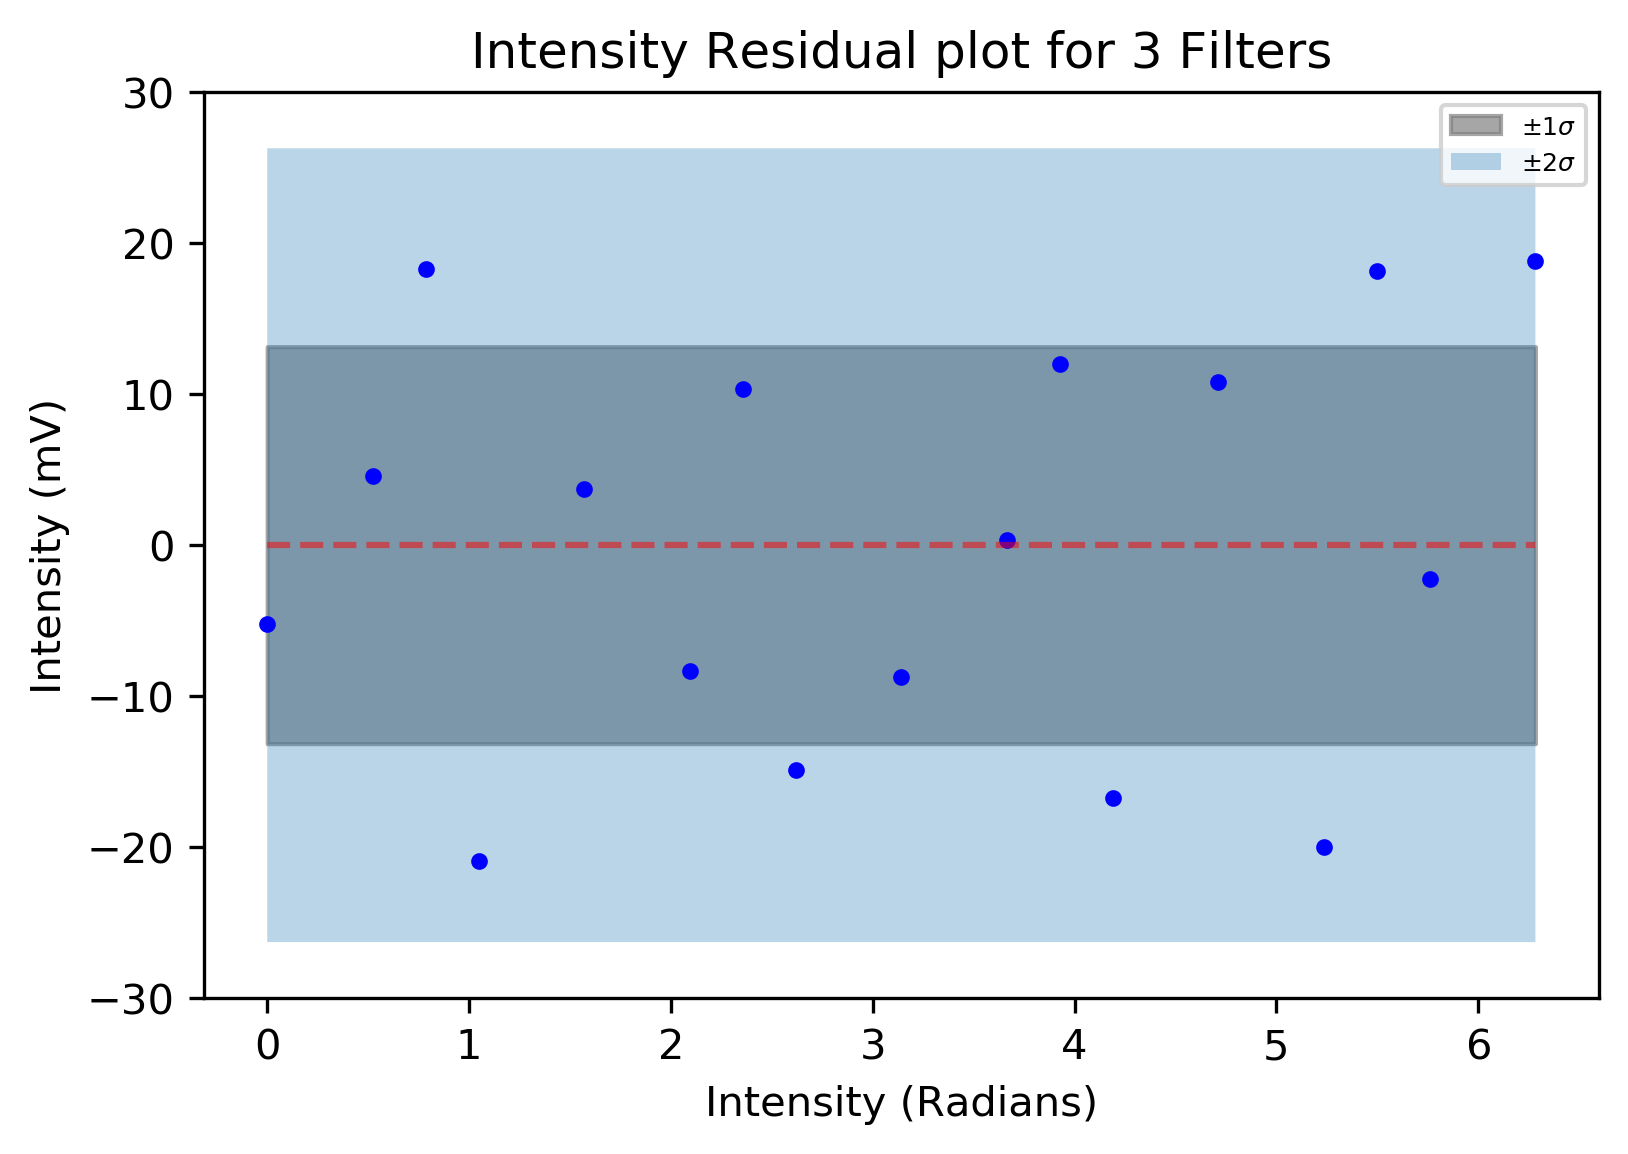

In [234]:
# Plotting the residual of the data points for 3 filters
plt.figure(dpi=300)
plt.ylim(ymin=-30, ymax=30)
plt.title('Intensity Residual plot for 3 Filters')
plt.ylabel('Intensity (mV)')
plt.xlabel('Intensity (Radians)')
plt.plot(angles, res3, "b.")
plt.plot(angles, np.zeros(len(angles)), "r--", alpha=0.5)

#Plot region of uncertainty for the data
plt.fill_between(xrange, np.zeros(len(xrange)) - np.std(res3), 
                 np.zeros(len(xrange)) + np.std(res3), alpha = 0.7, color='gray', 
                 label=r'$\pm 1 \sigma$')
plt.fill_between(xrange, np.zeros(len(xrange)) - 2*np.std(res3), 
                 np.zeros(len(xrange)) + 2*np.std(res3), alpha = 0.3, 
                 label=r'$\pm 2 \sigma$')

#Include legend
plt.legend(loc=0, prop={'size': 6})
plt.show()

In [228]:
# Calculate the Chi-square statistic for the 3 filter fit
summ2 = np.array([])
std2 = np.std(res3)
for i in range(len(res3)):
    summ2 = np.append(summ2, res3[i]**2 / std2**2)
Chi3 = np.sum(summ2)
print(Chi3, Chi3/(len(angles)-len(fitparams3)))

17.000000000000004 1.307692307692308
